<a href="https://colab.research.google.com/github/corin2junseo/AiProject/blob/main/%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                         # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설



158124.0
239445.5
25037.5
43688.5
187727.0
654022.5



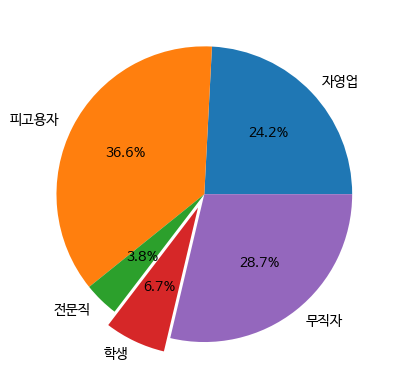

,자영업(소계),자영업(농.임.수산업),자영업(광업),자영업(제조업),자영업(건설업),자영업(도.소매업),자영업(무역업),자영업(요식업),자영업(숙박업),자영업(유흥업),...,전문직(기타전문직),공무원,기타(소계),기타(학생),기타(주부),기타(전경.의경),기타(공익요원),기타(기타),무직자,미상
범죄중분류,,,,,,,,,,,,,,,,,,,,,
강간,761,77,0,7,57,7,1,32,17,19,...,115,44,1543,699,4,2,9,829,1296,638
강도,87,2,0,0,8,0,1,0,2,7,...,3,1,355,239,6,0,0,110,509,66
강제추행,2246,198,0,42,160,15,11,102,21,45,...,436,263,3590,1294,25,2,13,2256,3321,1513
공갈,398,30,0,12,43,1,3,16,2,7,...,38,7,1105,735,30,0,0,340,913,428
기타 강간 강제추행등,39,10,0,0,6,0,0,2,2,1,...,1,0,119,68,2,0,1,48,90,18


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/경찰청_범죄자 직업_12_31_2020.csv'
dforiginal = pd.read_csv(filename, encoding='cp949')
df = dforiginal.drop(['범죄대분류'],axis=1)
df = df.groupby('범죄중분류').sum()

#df = df.transpose()

#self_employment = df.filter(like='자영업').sum().sum()
#나누기 2를 해서 소계만 구함
self_employment = (df['자영업(소계)'].sum().sum())/2
employee = df['피고용자(소계)'].sum().sum()/2
professional = df['전문직(소계)'].sum().sum()/2
student = df['기타(학생)'].sum().sum()/2
unemployed = df['무직자'].sum().sum()/2












all_sum = self_employment+employee+professional+student+unemployed

print(self_employment)
print(employee)
print(professional)
#print(public_official)
print(student)
print(unemployed)
print(all_sum)
print()


ratio = [158124.0,239445.5,25037.5,43688.5,187727.0]
labels=['자영업','피고용자','전문직','학생','무직자']
explode = [0,0,0, 0.1,0.0]

plt.pie(ratio, labels=labels, explode=explode,autopct='%.1f%%', textprops={'fontsize': 10})


plt.show()

df.head()

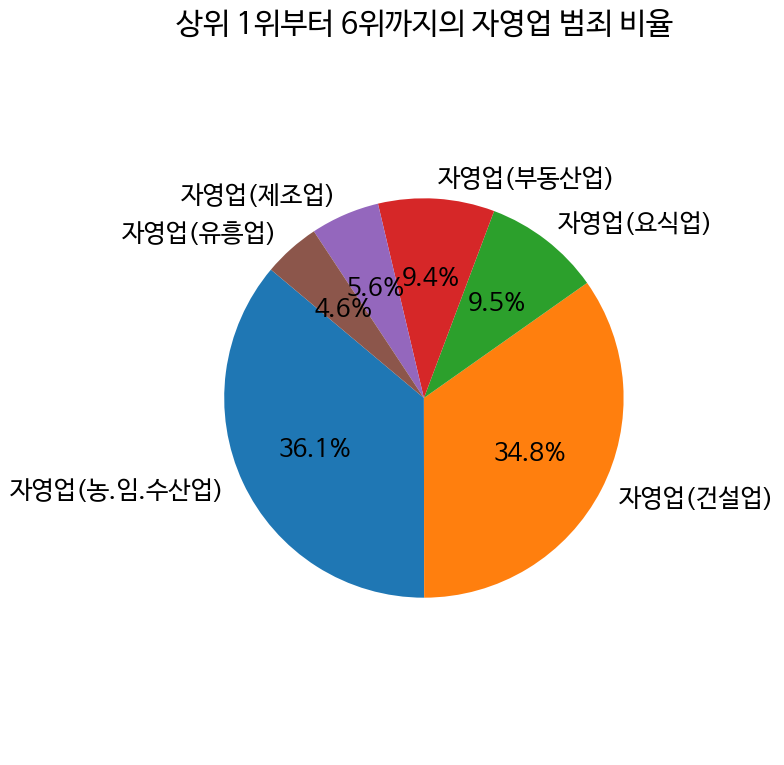

In [6]:
# '자영업'에 해당하는 칼럼들만 선택하여 각 칼럼의 합을 계산하여 가장 큰 값 6개의 칼럼명 찾기
self_employment_columns = ['자영업(농.임.수산업)', '자영업(광업)', '자영업(제조업)', '자영업(건설업)',
       '자영업(도.소매업)', '자영업(무역업)', '자영업(요식업)', '자영업(숙박업)', '자영업(유흥업)',
       '자영업(금융업)', '자영업(부동산업)', '자영업(의료보건업)', '자영업(차량정비업)', '자영업(노점)',
       '자영업(행상)']

# '자영업'에 해당하는 칼럼 데이터 가져오기
self_employment_data = df[self_employment_columns].sum()

# 상위 1위부터 6위까지의 칼럼명 추출 (수정된 부분: nlargest의 n값을 6으로 수정)
top_1_to_6_self_employment_columns = self_employment_data.nlargest(6).index

# 상위 1위부터 6위까지의 칼럼 데이터 가져오기 및 시각화
top_1_to_6_self_employment_data = self_employment_data[top_1_to_6_self_employment_columns]

# 파이 차트로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(top_1_to_6_self_employment_data, labels=top_1_to_6_self_employment_data.index, autopct='%1.1f%%', startangle=140)
plt.title('상위 1위부터 6위까지의 자영업 범죄 비율')  # 수정된 부분: 제목도 6위까지 표시하도록 수정
plt.axis('equal')  # 원을 원형으로 유지
plt.tight_layout()
plt.show()


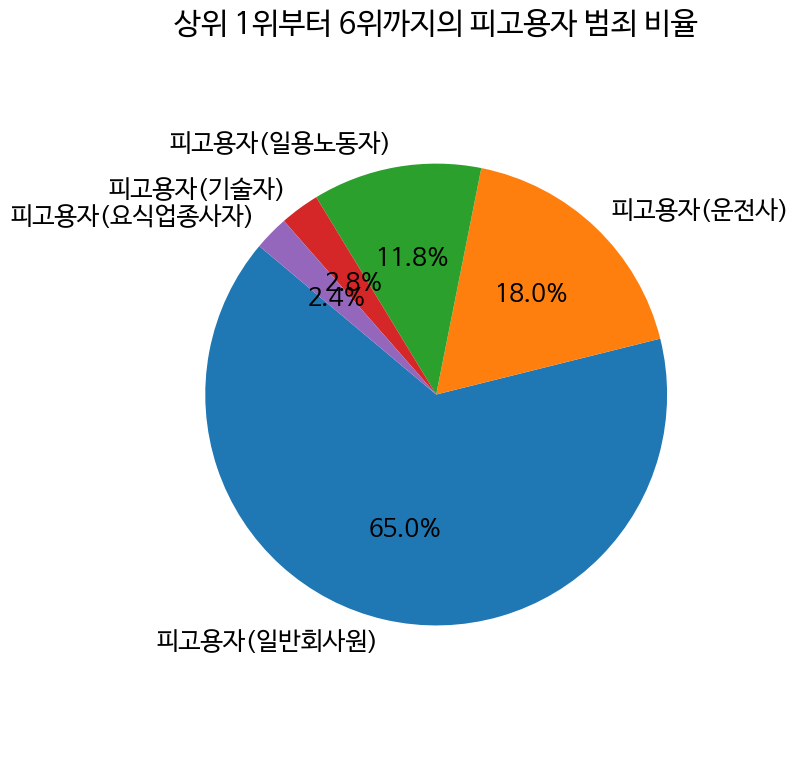

In [11]:
# '피고용자'에 해당하는 칼럼들만 선택하여 각 칼럼의 합을 계산하여 가장 큰 값 6개의 칼럼명 찾기
employee_columns = ['피고용자(교원(사립))', '피고용자(사무원)', '피고용자(기술자)', '피고용자(점원)',
       '피고용자(공원)', '피고용자(운전사)', '피고용자(경비원)', '피고용자(외판원)', '피고용자(국공영기업체직원)',
       '피고용자(일반회사원)', '피고용자(금융기관직원)', '피고용자(유흥업종사자)', '피고용자(요식업종사자)', '피고용자(일용노동자)']

# '피고용자'에 해당하는 칼럼 데이터 가져오기
employee_data = df[employee_columns].sum()

# 상위 1위부터 5위까지의 칼럼명 추출
top_1_to_5_employee_columns = employee_data.nlargest(5).index

# 상위 1위부터 5위까지의 칼럼 데이터 가져오기
top_1_to_5_employee_data = employee_data[top_1_to_5_employee_columns]

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(top_1_to_5_employee_data, labels=top_1_to_5_employee_data.index, autopct='%1.1f%%', startangle=140)
plt.title('상위 1위부터 6위까지의 피고용자 범죄 비율')
plt.axis('equal')  # 원을 원형으로 유지
plt.tight_layout()
plt.show()



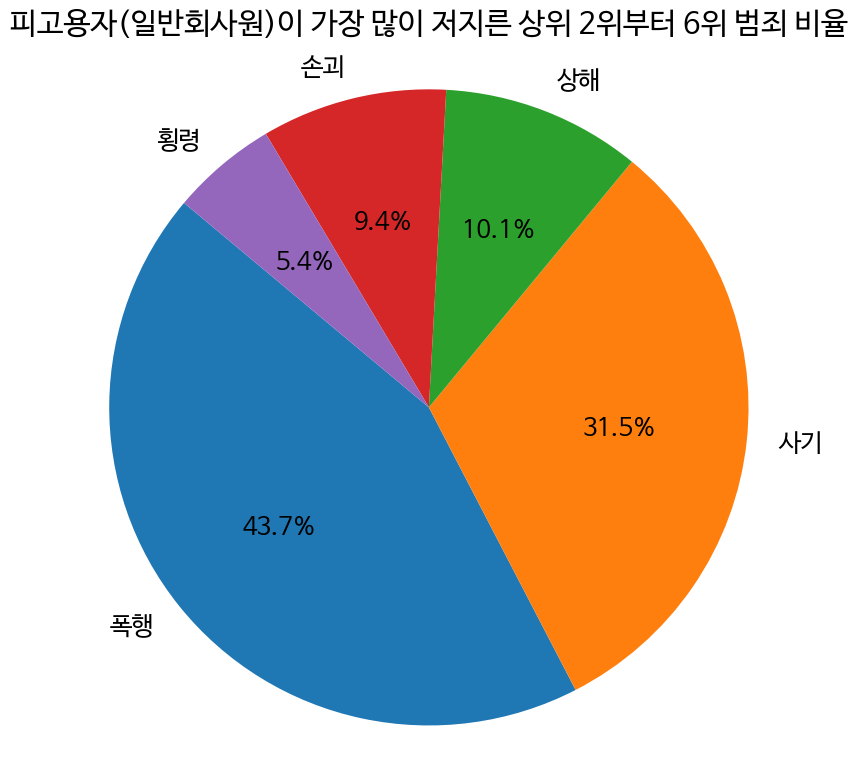

In [12]:
# '피고용자(일반회사원)' 칼럼을 기준으로 상위 2위부터 6위까지 범죄명 확인
top_2_to_6_crimes_by_employees = df['피고용자(일반회사원)'].nlargest(6)[1:]  # 2위부터 6위까지 선택(소계 컬럼 제외하기 위함)

# 상위 2위부터 6위까지 범죄명의 원형 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(top_2_to_6_crimes_by_employees, labels=top_2_to_6_crimes_by_employees.index, autopct='%1.1f%%', startangle=140)
plt.title('피고용자(일반회사원)이 가장 많이 저지른 상위 1위부터 5위 범죄 비율', pad=20)  # pad를 사용하여 제목과 차트 간격 조정
plt.axis('equal')  # 원을 원형으로 유지
plt.tight_layout()
plt.show()


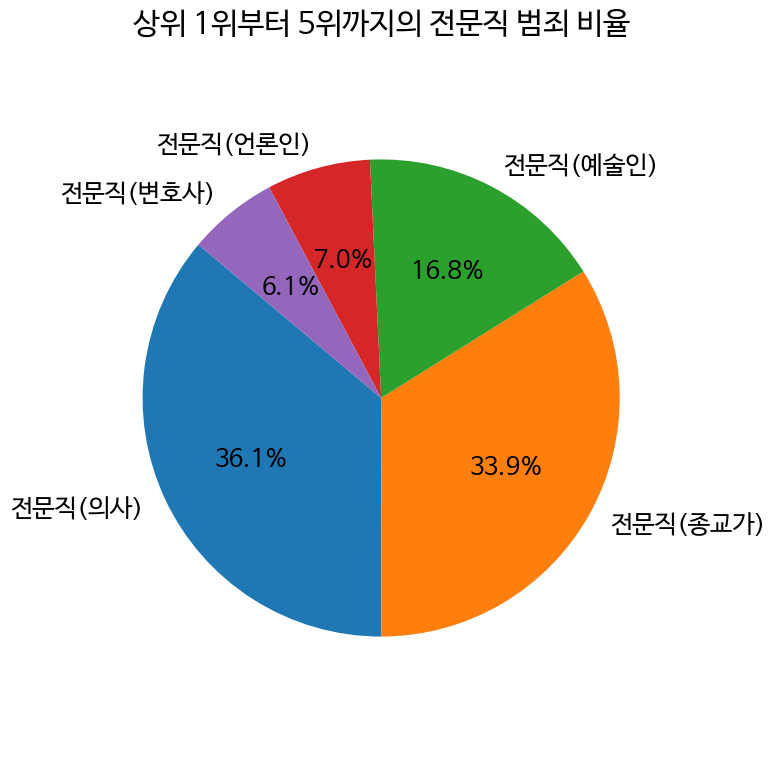

In [14]:
# '전문직'에 해당하는 칼럼들만 선택하여 각 칼럼의 합을 계산하여 가장 큰 값 6개의 칼럼명 찾기
professional_columns = ['전문직(의사)', '전문직(변호사)', '전문직(교수)', '전문직(종교가)', '전문직(언론인)',
       '전문직(예술인)']

# '전문직'에 해당하는 칼럼 데이터 가져오기
professional_data = df[professional_columns].sum()

# 상위 1위부터 5위까지의 칼럼명 추출 (전문직(소계),전문직(기타) 제외를 위한 작업)
top_1_to_5_professional_columns = professional_data.nlargest(5).index

# 상위 1위부터 5위까지의 칼럼 데이터 가져오기
top_1_to_5_professional_data = professional_data[top_1_to_5_professional_columns]

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(top_1_to_5_professional_data, labels=top_1_to_5_professional_data.index, autopct='%1.1f%%', startangle=140)
plt.title('상위 1위부터 5위까지의 전문직 범죄 비율')
plt.axis('equal')  # 원을 원형으로 유지
plt.tight_layout()
plt.show()


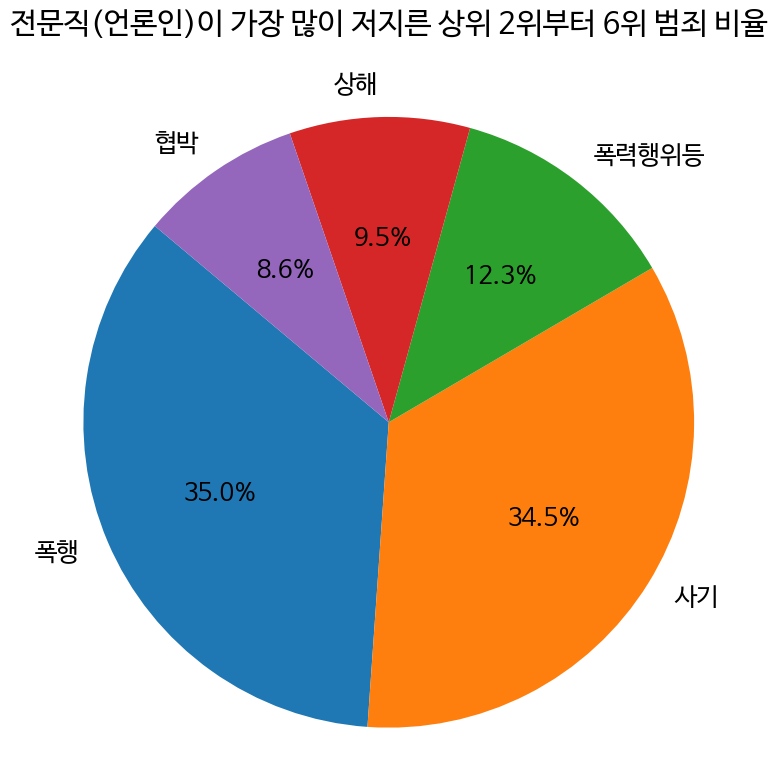

In [ ]:
# '전문직(언론인)' 칼럼을 기준으로 상위 2위부터 6위까지 범죄명 확인
top_2_to_6_crimes_employed_by_journalists = df['전문직(언론인)'].nlargest(6)[1:]  # 2위부터 6위까지 선택

# 상위 2위부터 6위까지 범죄명의 원형 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(top_2_to_6_crimes_employed_by_journalists, labels=top_2_to_6_crimes_employed_by_journalists.index, autopct='%1.1f%%', startangle=140)
plt.title('전문직(언론인)이 가장 많이 저지른 상위 2위부터 6위 범죄 비율', pad=40)  # pad를 사용하여 제목과 차트 간격 조정
plt.axis('equal')  # 원을 원형으로 유지
plt.tight_layout()
plt.show()


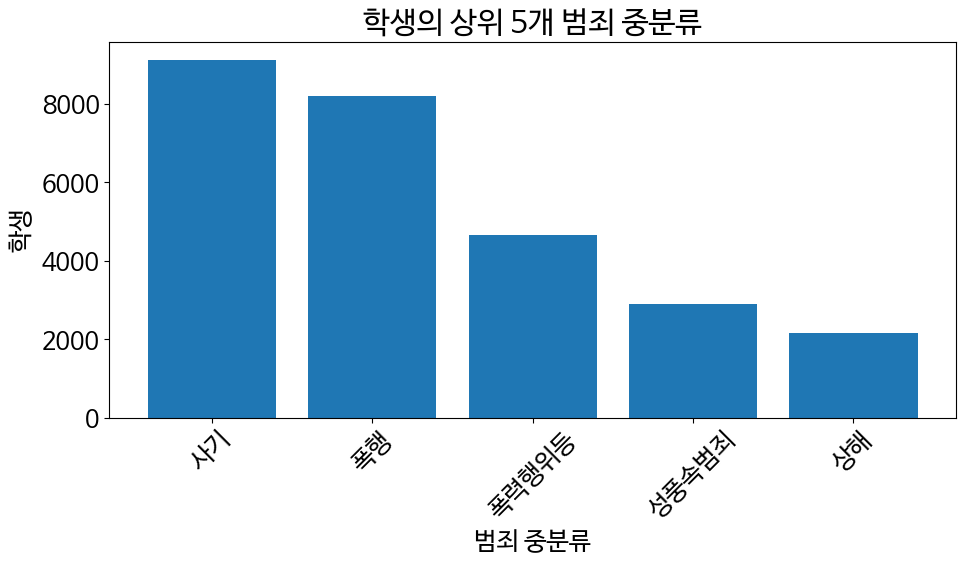

In [ ]:
top_6_students = df['기타(학생)'].nlargest(6)
# 상위 2번째부터 6번째까지의 데이터프레임 생성 (소계를 제외하기 위해)
student_df = pd.DataFrame({'범죄중분류': top_6_students.index[1:], '기타(학생)': top_6_students.values[1:]})

# 새로운 데이터프레임을 이용한 막대 그래프
plt.figure(figsize=(10, 6))
plt.bar(student_df['범죄중분류'], student_df['기타(학생)'])
plt.xlabel('범죄 중분류')
plt.ylabel('학생')
plt.title('학생의 상위 5개 범죄 중분류')
plt.xticks(rotation=45)  # x 축 라벨을 회전
plt.tight_layout()
plt.show()

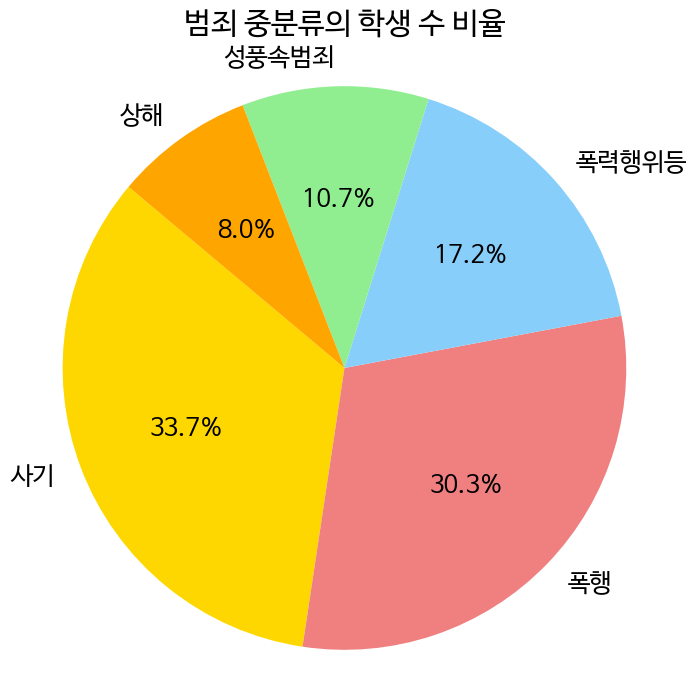

In [ ]:


# 새로운 데이터프레임을 이용하여 파이 차트 그리기
plt.figure(figsize=(8, 8))

# 색상
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# 상위 2번째부터 6번째까지의 값들을 이용하여 파이 차트 생성
plt.pie(student_df['기타(학생)'], labels=student_df['범죄중분류'], colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # 원을 원형으로 보이기 위해
plt.title('범죄 중분류의 학생 수 비율', pad=20)  # 제목 이동 (pad는 여백)
plt.show()


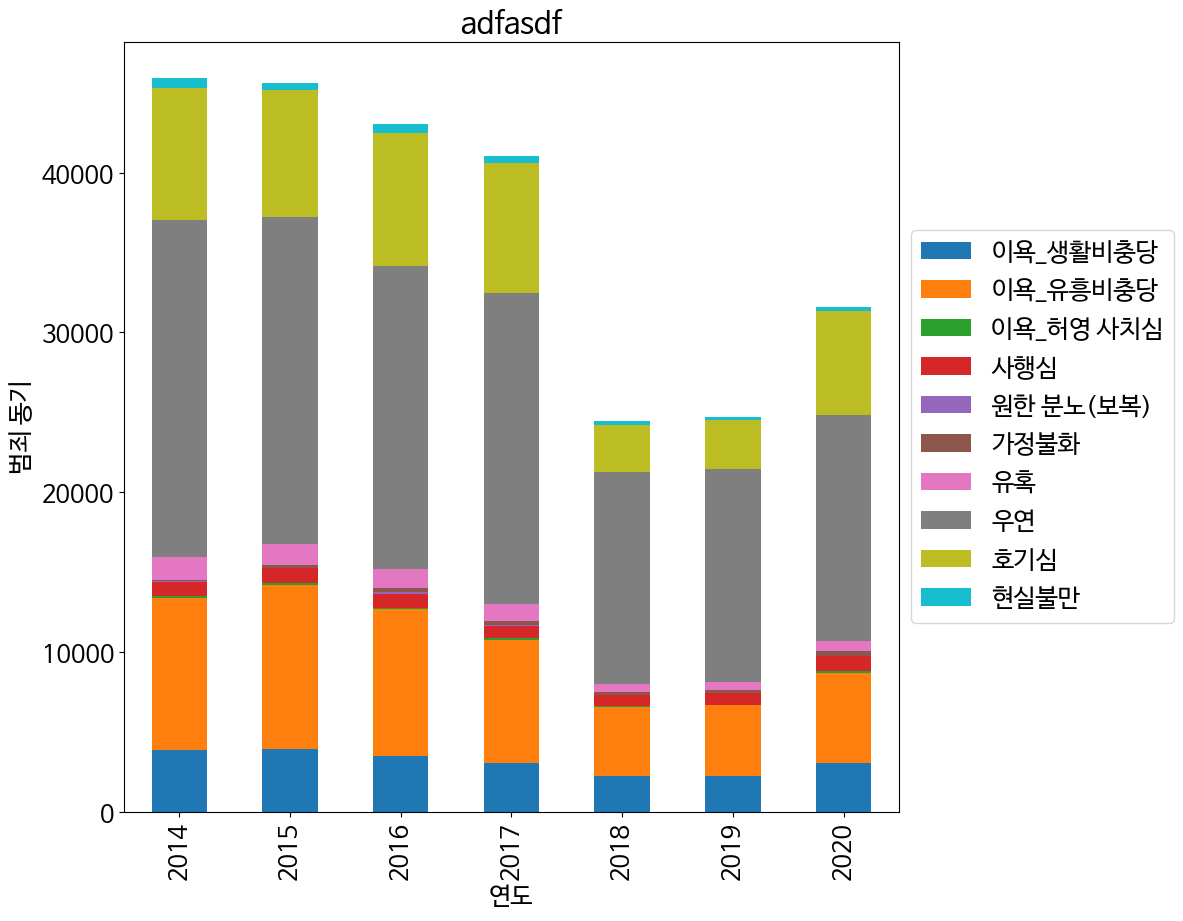

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/경찰청_미성년자 범행 동기 현황_20201231.csv'
dforiginal = pd.read_csv(filename, encoding='cp949')
df = dforiginal.drop(['기타','총합'], axis=1)

# '연도' 열을 인덱스로 설정하여 플로팅
df.set_index('연도', inplace=True)

df.plot(kind='bar', stacked=True, figsize=(10, 10))

plt.title('adfasdf')
plt.xlabel('연도')
plt.ylabel('범죄 동기')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


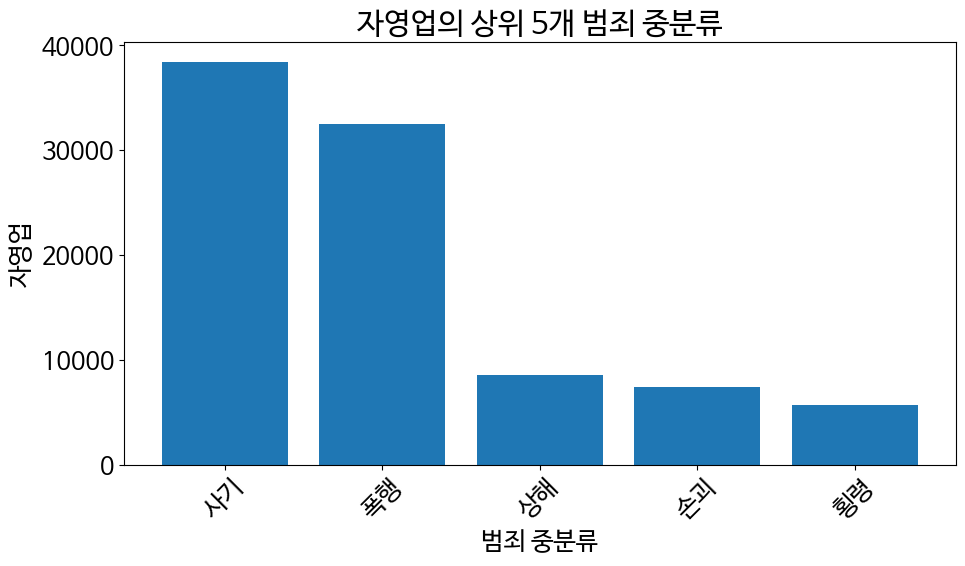

In [ ]:
top_6_self_employment = df['자영업(소계)'].nlargest(6)
# 상위 2번째부터 6번째까지의 데이터프레임 생성 (소계를 제외하기 위해)
self_employment_df = pd.DataFrame({'범죄중분류': top_6_self_employment.index[1:], '자영업(소계)': top_6_self_employment.values[1:]})


# 새로운 데이터프레임을 이용한 막대 그래프
plt.figure(figsize=(10, 6))
plt.bar(self_employment_df['범죄중분류'], self_employment_df['자영업(소계)'])
plt.xlabel('범죄 중분류')
plt.ylabel('자영업')
plt.title('자영업의 상위 5개 범죄 중분류')
plt.xticks(rotation=45)  # x 축 라벨을 회전
plt.tight_layout()
plt.show()

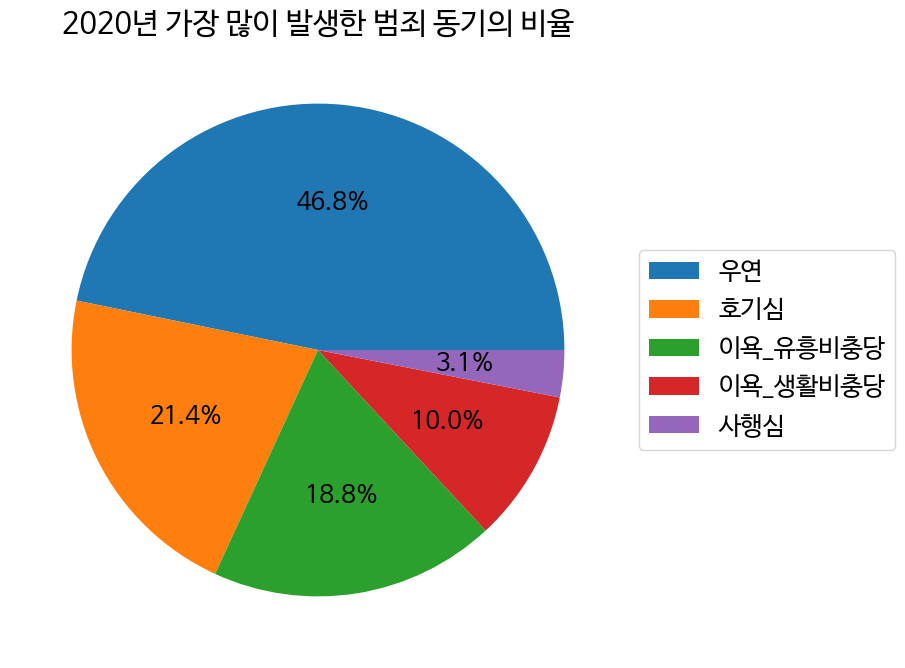

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

filename = '/content/경찰청_미성년자 범행 동기 현황_20201231.csv'
dforiginal = pd.read_csv(filename, encoding='cp949')
df = dforiginal.drop(['기타', '총합'], axis=1)

# '연도'가 2020년인 데이터 필터링
df_2020 = df[df['연도'] == 2020].drop('연도', axis=1)

# 가장 많은 5개의 범죄 동기 찾기
top_5_crimes = df_2020.sum().nlargest(5).index.tolist()

# 가장 많은 5개의 범죄 동기에 대한 데이터 필터링
df_top_5 = df_2020[top_5_crimes]

# 5가지 범죄 동기의 비율을 하나의 원 그래프로 플로팅
plt.figure(figsize=(8, 8))
df_top_5.sum().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.legend(labels=df_top_5.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('')
plt.title('2020년 가장 많이 발생한 범죄 동기의 비율')
plt.show()